In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#Loading and viewing the first five records of the dataset

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Assigning features and targets to variables 'X' & 'Y' respectively

X = df["Hours"]
Y = df["Scores"]

[]

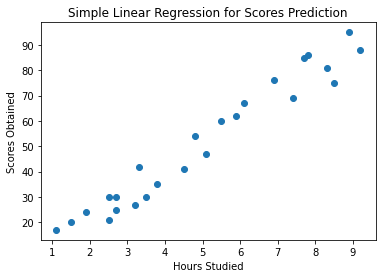

In [4]:
#Visualizing the data

plt.scatter(X, Y)
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.title("Simple Linear Regression for Scores Prediction")
plt.plot()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [6]:
# Define Regressor class
class LinearRegression():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self):
      self.slope_req = 0
      self.intercept_req = 0
      self.y_pred = []
    def slope(self, X, Y):
      self.slope_req = (len(X)*((X*Y).sum())- (X.sum()*Y.sum()))/(len(X)*((X*X).sum())-(X.sum()**2))
      return self.slope_req
    def intercept(self, X, Y):
      self.intercept_req = (Y.sum()- self.slope(X, Y)*(X.sum()))/len(X)
      return self.intercept_req
    def fit(self, X, Y):
      self.y_pred = (self.slope(X, Y)*X)+self.intercept(X, Y)
      self.rmse = (np.sqrt(mean_squared_error(Y, self.y_pred)))
      plt.scatter(X, Y, color = 'blue')
      plt.scatter(X, self.y_pred, color = 'orange')
      plt.title("Linear Regression Training Results")
      plt.xlabel("Features")
      plt.ylabel("Target")
      plt.plot(X, self.y_pred, color = 'brown')
      plt.show()
      return("The model's validation evaluation using RMSE is: {}".format(self.rmse))
    def predict(self, X):
      self.pred = (self.slope_req*X)+self.intercept_req
      plt.scatter(X_test, Y_test, color = 'blue')
      plt.scatter(X, self.pred, color = 'orange')
      plt.title("Linear Regression Testing Results")
      plt.xlabel("Features")
      plt.ylabel("Target")
      plt.plot(X_train,self.y_pred, color = 'brown')
      plt.show()
      print("\n\nThe predicted score(s): \n\n",self.pred)
      if len(np.array(X).shape) != 0:
        self.rmse = (np.sqrt(mean_squared_error(Y_test, self.pred)))
      return(print("\n\nThe model's accuracy evaluation using RMSE is: {}".format(self.rmse)))

In [7]:
regressor = LinearRegression()

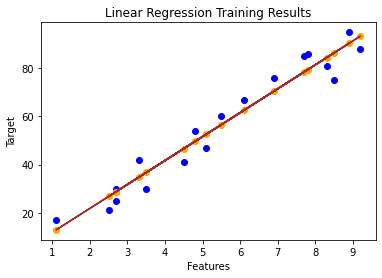

"The model's validation evaluation using RMSE is: 5.705293775740586"

In [8]:
regressor.fit(X_train, Y_train)

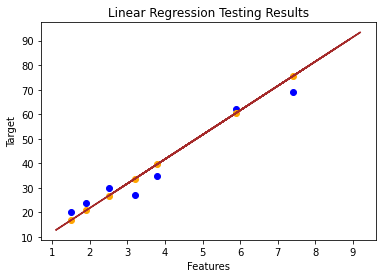



The predicted score(s): 

 5     16.844722
2     33.745575
19    75.500624
16    26.786400
11    60.588106
22    39.710582
17    20.821393
Name: Hours, dtype: float64


The model's accuracy evaluation using RMSE is: 4.509204328368801


In [9]:
regressor.predict(X_test)

In [10]:
X_test

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
Name: Hours, dtype: float64

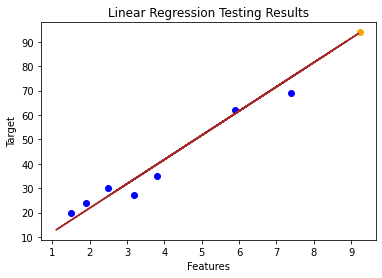



The predicted score(s): 

 93.8927288934165


The model's accuracy evaluation using RMSE is: 4.509204328368801


In [11]:
#Given problem to predict score when the X = 9.25

result = regressor.predict(9.25)